In [1]:
import geopandas as gpd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [3]:
sql = '''
SELECT 
OBJECTID AS id,
rlidname AS name,
speed,
Shape.STAsBinary() AS geom
FROM dbo.Road;
'''

In [4]:
road = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geom')

In [5]:
road.crs = "EPSG:2914"

In [6]:
road = road.to_crs(epsg=3857)

In [8]:
MPObd = gpd.read_file("X:/Data/Transportation/MPO_Bound.shp")

In [9]:
road_cl = gpd.clip(road, MPObd)

In [11]:
bike_counts_loc = gpd.read_file(r'T:\DCProjects\Modeling\AADBT\input\shp\BikeCountsLocations.shp')

In [13]:
bike_counts_loc = bike_counts_loc.to_crs(epsg=3857)

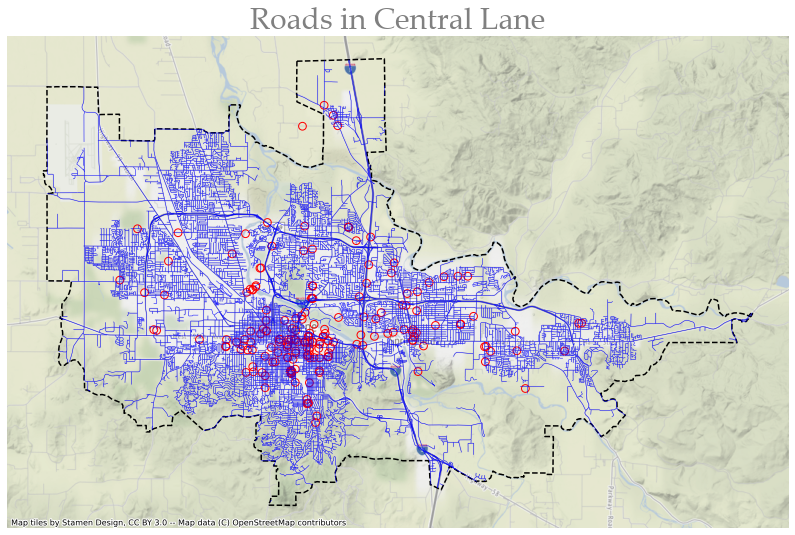

In [14]:
fig, ax = plt.subplots(figsize=(14, 12))
road_cl.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
bike_counts_loc.plot(ax=ax, marker ='o', facecolor="none", edgecolor="red", markersize=60, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Roads in Central Lane", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");